## In this section we will be using the Transfer Learning to predict the out of our data:

Here , we will be working on the same data we had worked before for our cnn model but will be using the transfer klearning on the same dta will see what makes it different and will compare all the predictions

In [ ]:
import datetime

In [ ]:
# lets import the data of 10 % food_classification data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Lets see how many images are there in directory
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [ ]:
## NOw Preaparing the data(Creating Data Loaders)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   )
test_datagen = ImageDataGenerator(rescale=1/255.)
print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [ ]:
## Lets Create a Tensorboard call back
import datetime
import tensorflow as tf
def create_tensorboard_callback(dir_name,experiment_name):
  Log_dir=dir_name + "/" + experiment_name +"/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=Log_dir)
  return tensorboard_callback


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:

# NOw let just import our model from tenssforflow hub
Best_model='https://www.kaggle.com/models/google/aiy/TensorFlow1/vision-classifier-food-v1/1'
resnet_model= "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficient_net_model=efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"



In [ ]:
# # Lets create a function which can load our model
# def create_model(model_url,num_classes=10):

#   !pip install -q tensorflow tensorflow-hub

#   import tensorflow as tf
#   import tensorflow_hub as hub

#   # Load model from TF Hub
#   model_url = "https://tfhub.dev/google/aiy/vision/classifier/food_V1/1"
#   feature_extractor = hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False)

#   # Build model
#   model = tf.keras.Sequential([
#       feature_extractor,
#       tf.keras.layers.Dense(10, activation='softmax')
#   ])


#   return model

## Now lets just build our  first Transfer learning model

In [ ]:
from tensorflow.keras.applications import ResNet50,EfficientNetV2B0
from tensorflow.keras import layers, models

# set a random seed
tf.random.set_seed(42)

# create a model
base_model=ResNet50(include_top=False,input_shape=(224,224,3))

# Build your model
model_resnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # <-- converts (7,7,2048) -> (2048,)
    layers.Dense(10, activation='softmax') ])

# Compile a model
model_resnet.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )
# Fit a model
resnet_history=model_resnet.fit(train_data,
                                epochs=10,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback(dir_name="Tensorflow_hub",
                                                                       experiment_name="resnet_model")] )

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3200 - loss: 2.2942 - val_accuracy: 0.1000 - val_loss: 50727.7422
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 657ms/step - accuracy: 0.4623 - loss: 1.7608 - val_accuracy: 0.1000 - val_loss: 27516.1562
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 653ms/step - accuracy: 0.6280 - loss: 1.1207 - val_accuracy: 0.1000 - val_loss: 894.3558
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 614ms/step - accuracy: 0.8309 - loss: 0.5565 - val_accuracy: 0.1000 - val_loss: 63.1268
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 624ms/step - accuracy: 0.9169 - loss: 0.2778 - val_accuracy: 0.1000 - val_loss: 22.1159
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 659ms/step - accuracy: 0.9428 - loss: 0.2024 - val_accuracy: 0.1000 - val_loss: 14.8059
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 644ms/step - accuracy: 0.9343 - loss: 0.2140 - val_accuracy: 0.1000 - val_loss: 8.2095
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 641ms/step - accuracy: 0.9517 - loss: 0.1582

In [ ]:
# Lets create a loss function for plot the history of a mkodel

def plot_loss_curve(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  # lets plot the loss curve
  plt.plot(epochs,loss,label="Training+label")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy plot
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


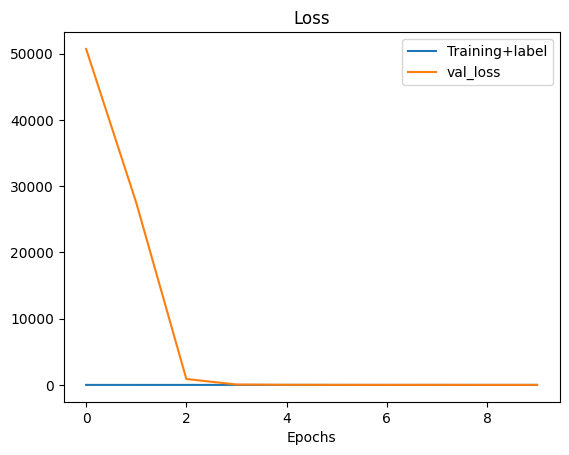

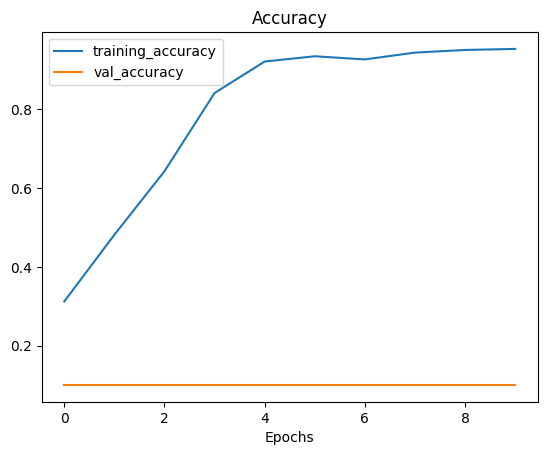

In [ ]:
plot_loss_curve(resnet_history)

## lets try on Another model

In [ ]:
from tensorflow.keras.applications import ResNet50,EfficientNetV2B0
from tensorflow.keras import layers, models

# set a random seed
tf.random.set_seed(42)

# create a model
base_model=EfficientNetV2B0(include_top=False,input_shape=(224,224,3))

# Build your model
model_efficientnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # <-- converts (7,7,2048) -> (2048,)
    layers.Dense(10, activation='softmax') ])

# Compile a model
model_efficientnet.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )
# Fit a model
efficientnet_history=model_efficientnet.fit(train_data,
                                epochs=10,
                                steps_per_epoch=len(train_data),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback(dir_name="Tensorflow_hub",
                                                                       experiment_name="resnet_model")] )

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.3104 - loss: 1.9948 - val_accuracy: 0.1000 - val_loss: 2.3307
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - accuracy: 0.7560 - loss: 0.7788 - val_accuracy: 0.1000 - val_loss: 2.7200
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 469ms/step - accuracy: 0.9017 - loss: 0.3221 - val_accuracy: 0.1008 - val_loss: 3.2037
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 476ms/step - accuracy: 0.9708 - loss: 0.1485 - val_accuracy: 0.2656 - val_loss: 2.9238
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 572ms/step - accuracy: 0.9686 - loss: 0.1035 - val_accuracy: 0.1136 - val_loss: 3.4248
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 493ms/step - accuracy: 0.9632 - loss: 0.1388 - val_accuracy: 0.0952 - val_loss: 2.3452
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 461ms/step - accuracy: 0.9474 - loss: 0.1877 - val_accuracy: 0.1144 - val_loss: 2.3822
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 421ms/

# Lets try some data augmentation on our training data as there is no improvement of validation score:

Also let just add some more training data as we are getting really poor predictions


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2025-10-13 17:58:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 172.217.194.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.8MB/s    in 24s     

2025-10-13 17:58:58 (20.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# let walk through the os
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
   print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [ ]:

# Now just create a train and test directories

train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"



In [ ]:
# Now let just get the class names for our data

import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


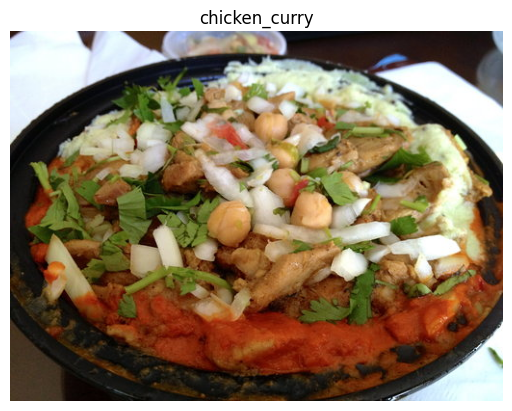

In [ ]:
# Now just view the ranodm image from the traing data set
import random

img= view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))


In [ ]:
# Now just preprocess the data using ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           horizontal_flip=True,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2)

test_datagen=ImageDataGenerator(rescale=1/255.)

# Now let just load the data inyo the direectories

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical",
                                                                  seed=42,)

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           class_mode="categorical",
                                           batch_size=32,
                                           seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# now lets build the model
from tensorflow.keras.applications import EfficientNetB0,ResNet50V2
from tensorflow.keras import layers

# Create a model

base_model=EfficientNetB0(include_top=False,
                          input_shape=(224,224,3)
                          )

# build a model

EfficientNetV2B0_model=tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10,activation="softmax")
])

# compile a model
EfficientNetV2B0_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                optimizer=tf.keras.optimizers.Adam(),
                                metrics=["accuracy"])

# fit a model
history_model=EfficientNetV2B0_model.fit(train_data_augmented,
                                         epochs=10,
                                         steps_per_epoch=len(train_data_augmented),
                                         validation_data=test_data,
                                         validation_steps=len(test_data),
                                         callbacks=[create_tensorboard_callback(dir_name="Tensorflow_Hub",
                                                                                experiment_name="Augment_data")])

In [ ]:
 # now lets build the model
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0,ResNet50V2,EfficientNetV2M
from tensorflow.keras import layers

# Create a model

base_model=EfficientNetV2M(include_top=False,
                          input_shape=(224,224,3)
                          )

# build a model

EfficientNetV2M_model=tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10,activation="softmax")
])

# compile a model
EfficientNetV2M_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                                optimizer=tf.keras.optimizers.Adam(),
                                metrics=["accuracy"])

# fit a model
EfficientNetV2M_model=EfficientNetV2M_model.fit(train_data_augmented,
                                         epochs=10,
                                         steps_per_epoch=len(train_data_augmented),
                                         validation_data=test_data,
                                         validation_steps=len(test_data),
                                         callbacks=[create_tensorboard_callback(dir_name="Tensorflow_Hub",
                                                                                experiment_name="Augment_data")])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.4950 - loss: 1.5204 - val_accuracy: 0.1636 - val_loss: 2.6888
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 155s 657ms/step - accuracy: 0.7392 - loss: 0.8099 - val_accuracy: 0.1000 - val_loss: 2.7442
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 156s 663ms/step - accuracy: 0.7783 - loss: 0.6800 - val_accuracy: 0.1284 - val_loss: 2.8106
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 155s 659ms/step - accuracy: 0.8222 - loss: 0.5687 - val_accuracy: 0.1000 - val_loss: 3.1353
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 155s 659ms/step - accuracy: 0.8563 - loss: 0.4494 - val_accuracy: 0.1000 - val_loss: 3.3155
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 156s 663ms/step - accuracy: 0.8536 - loss: 0.4344 - val_accuracy: 0.2352 - val_loss: 2.1567
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 156s 661ms/step - accuracy: 0.8702 - loss: 0.3894 - val_accuracy: 0.1000 - val_loss: 2.6714
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 156s 664ms/step - accuracy: 0.8846 - lo

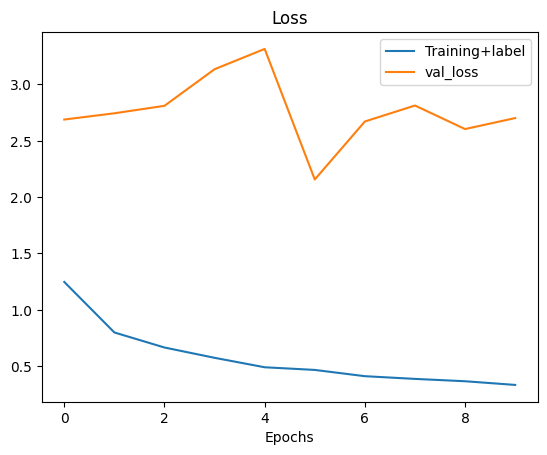

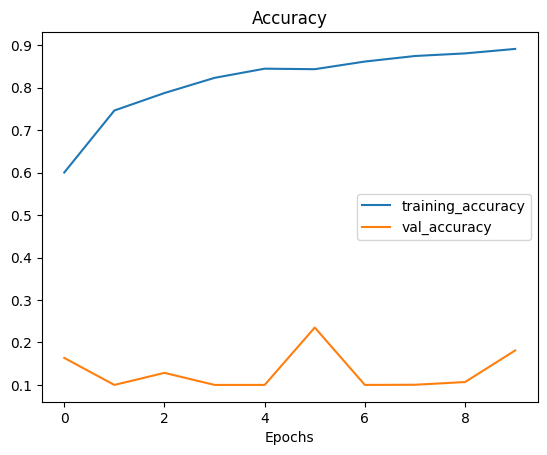

In [ ]:
plot_loss_curve(EfficientNetV2M_model)

